# Ejemplos de imágenes

Este notebook muestra ejemplos de imágenes del conjunto de datos. El objetivo es mostrar las diferencias entre las imágenes de las distintas regiones, los diferentes daños del pavimento que hay anotados y la calidad de las imágenes.

Este notebook supone que ya se han descargado los datos y ejecutado el notebook prepare-DatasetNinja.ipynb.

## Importar librerías

In [48]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt

## Configuración

In [49]:
path = '../data/rdd2022-DatasetNinja'
path_tail = 'train/fold_0/images'

# Definimos las regiones
REGIONS = ['China_Drone', 'China_MotorBike', 'Czech', 'India', 'Japan', 'United_States', 'Norway']

# Dispositivos de captura
DISPOSITIVO = {
    'China_Drone': 'Drone Camera',
    'China_MotorBike': 'Smartphone',
    'Czech': 'Dashcam',
    'India': 'Dashcam',
    'Japan': 'Dashcam',
    'Norway': 'High-resolution Cameras',
    'United_States': 'Google Street View'
}

## Seleccionamos una imagen de cada región

In [50]:
img_label_dict = {}

for region in REGIONS:
    # Cogemos una imagen y label aleatorio
    img_path = os.path.join(path, region, path_tail, np.random.choice(os.listdir(os.path.join(path, region, path_tail))))
    label_path = img_path.replace('images', 'labels').replace('.jpg', '.txt')
    # Guardamos la imagen y label
    img_label_dict[region] = (img_path, label_path)
    # Cogemos los labels
    with open(label_path, 'r') as f:
        labels = f.read()

## Plot con subplots (Básico)

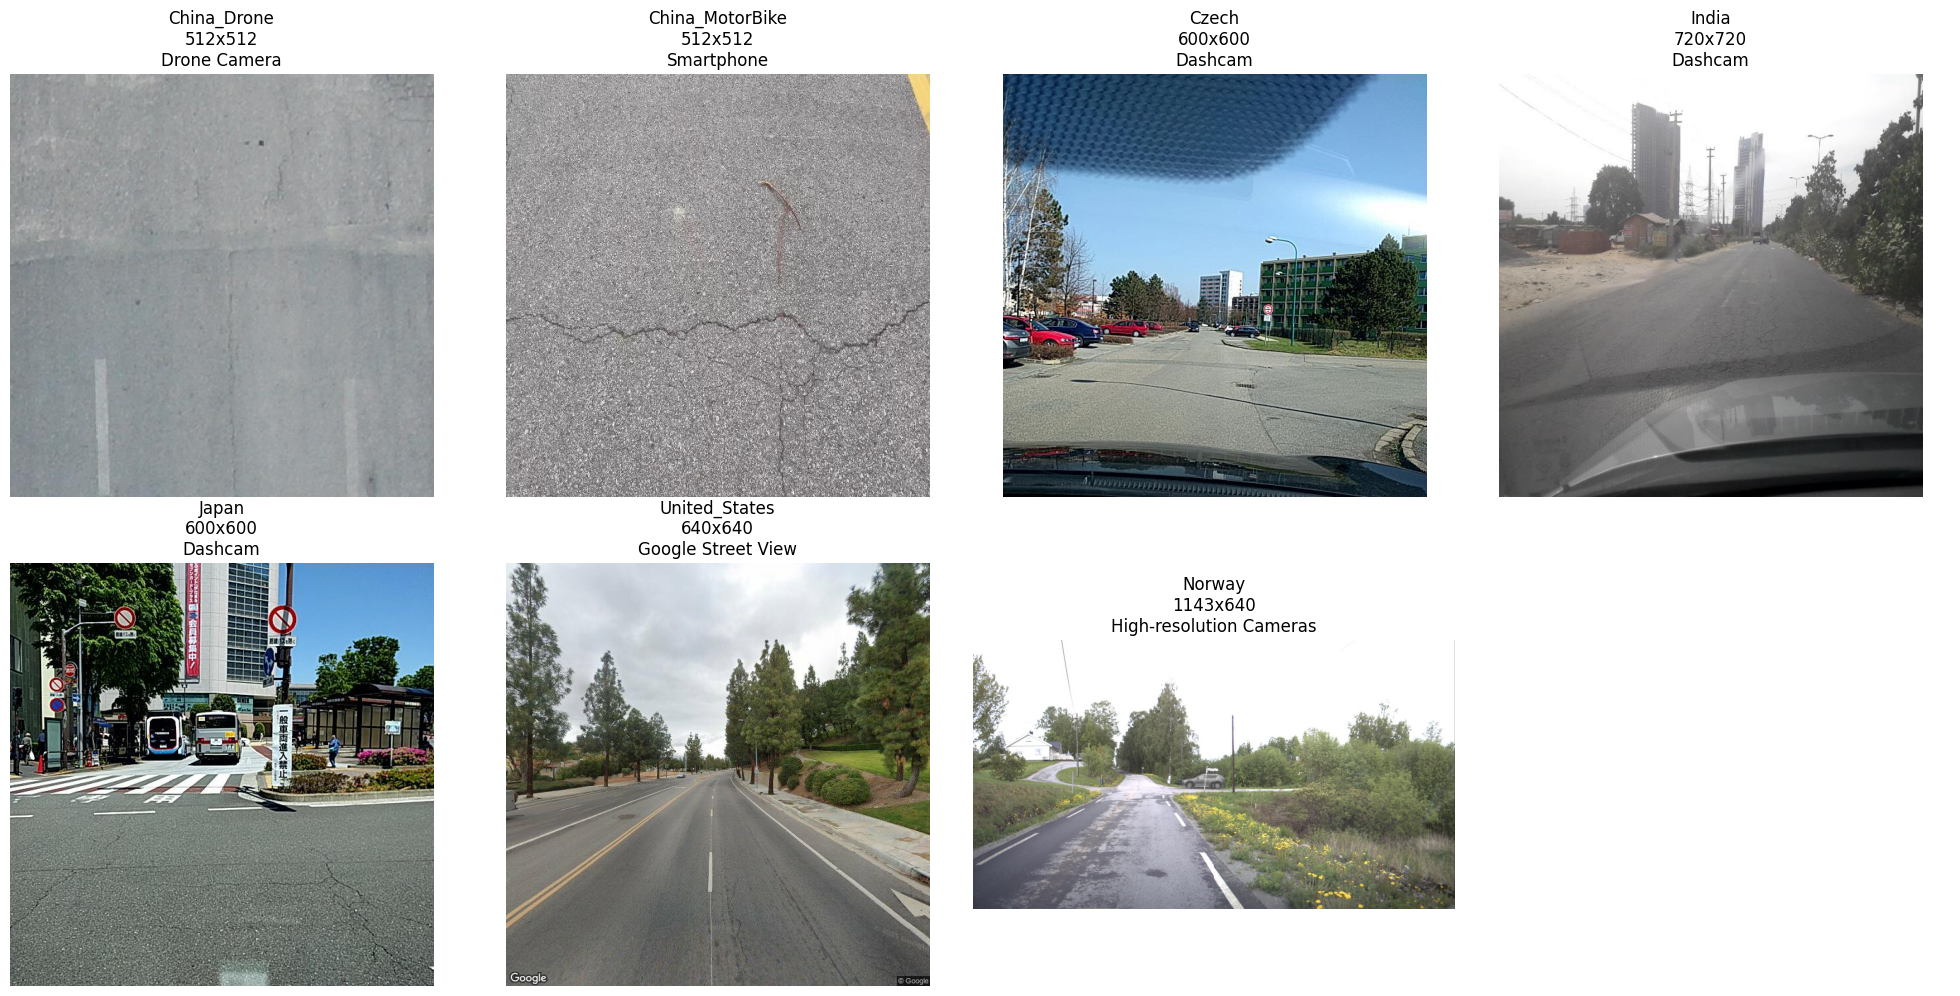

In [51]:
# Creamos un único plot que muestre todas las imágenes con su región indicada, la resolución y el dispositivo de captura
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
for i, region in enumerate(REGIONS):
    img_path, label_path = img_label_dict[region]
    img = plt.imread(img_path)
    resolution = f'{img.shape[1]}x{img.shape[0]}'
    device = DISPOSITIVO[region]
    axs[i//4, i%4].imshow(img)
    axs[i//4, i%4].set_title(f'{region}\n{resolution}\n{device}')
    axs[i//4, i%4].axis('off')

# Eliminamos los ejes de los subplots que no se han usado
for i in range(len(REGIONS), 8):
    axs[i//4, i%4].axis('off')

plt.tight_layout()
plt.show()

## Plot con subplots de diferentes tamaños

Ver [documentación](https://matplotlib.org/3.1.1/gallery/userdemo/demo_gridspec01.html#sphx-glr-gallery-userdemo-demo-gridspec01-py)

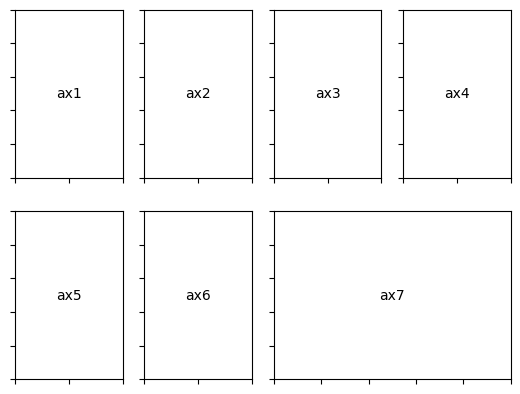

In [52]:
import matplotlib.pyplot as plt


def annotate_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        ax.tick_params(labelbottom=False, labelleft=False)


fig = plt.figure()
ax_China_Drone      = plt.subplot2grid((2, 4), (0, 0))
ax_China_MotorBike  = plt.subplot2grid((2, 4), (0, 1))
ax_Czech            = plt.subplot2grid((2, 4), (0, 2))
ax_India            = plt.subplot2grid((2, 4), (0, 3))
ax_Japan            = plt.subplot2grid((2, 4), (1, 0))
ax_Unites_States    = plt.subplot2grid((2, 4), (1, 1))
ax_Norway           = plt.subplot2grid((2, 4), (1, 2), colspan=2)

annotate_axes(fig)

plt.show()

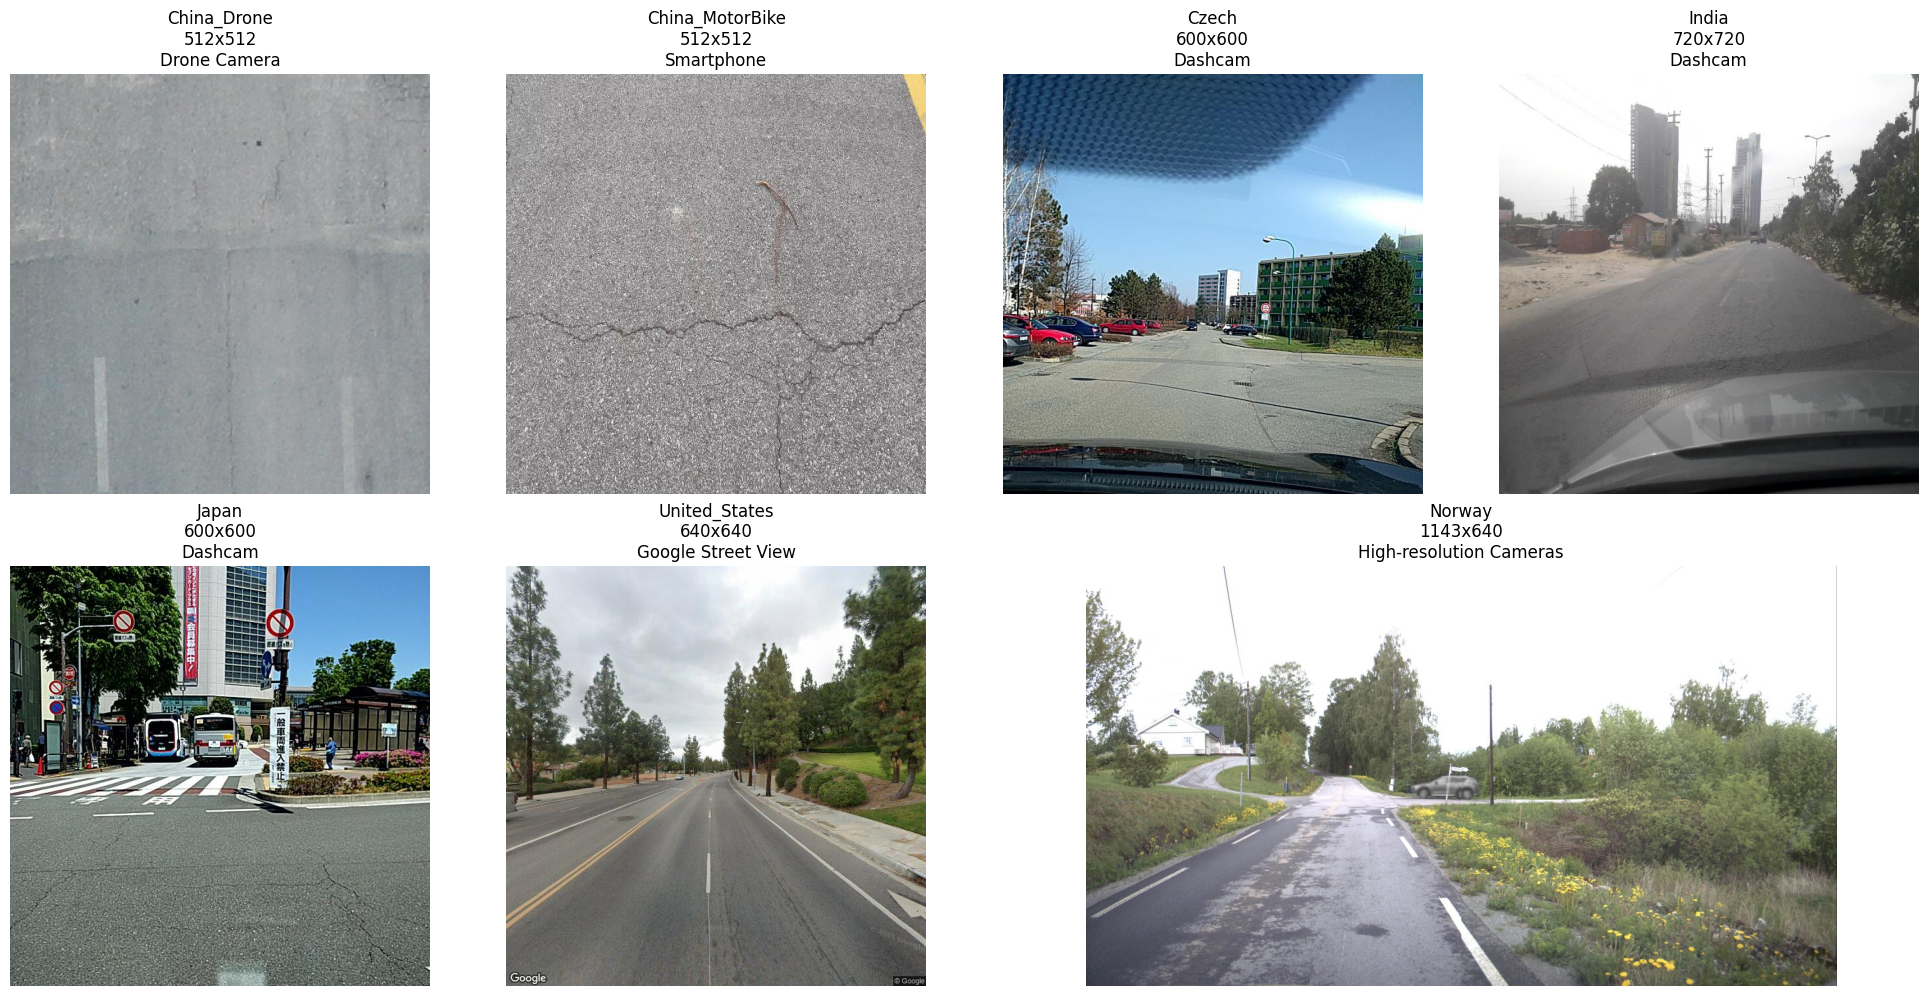

In [53]:
fig = plt.figure(figsize=(20, 10))

ax_China_Drone      = plt.subplot2grid((2, 4), (0, 0))
ax_China_MotorBike  = plt.subplot2grid((2, 4), (0, 1))
ax_Czech            = plt.subplot2grid((2, 4), (0, 2))
ax_India            = plt.subplot2grid((2, 4), (0, 3))
ax_Japan            = plt.subplot2grid((2, 4), (1, 0))
ax_Unites_States    = plt.subplot2grid((2, 4), (1, 1))
ax_Norway           = plt.subplot2grid((2, 4), (1, 2), colspan=2)

for region, ax in zip(REGIONS, [ax_China_Drone, ax_China_MotorBike, ax_Czech, ax_India, ax_Japan, ax_Unites_States, ax_Norway]):
    img_path, label_path = img_label_dict[region]
    img = plt.imread(img_path)
    resolution = f'{img.shape[1]}x{img.shape[0]}'
    device = DISPOSITIVO[region]
    ax.imshow(img)
    ax.set_title(f'{region}\n{resolution}\n{device}')
    ax.axis('off')

plt.tight_layout()
plt.savefig('../memoria/img/example_images_regions.png')
plt.show()